## Importing the libraries and setting up the working directory

In [131]:
import os
import zipfile
import pandas as pd
import pandas as pd
import os
import requests
from pymongo import MongoClient
import psycopg2
from sqlalchemy import create_engine
import psycopg2 
import io
import pandas.io.sql as sqlio
import requests
import json
import csv
import cv2
import pytesseract
import pandas as pd 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import lightgbm as lgb
import numpy as np
import pandas as pd
from fbprophet import Prophet


## File Download

In [501]:
# Creating the function to download the files from kaggle
def extract_data(file_name, file_path):
    #!kaggle competitions download  -d "NIFTY-50 Stock Market Data (2000 - 2020)" # -f $file_name -p $file_path --force
    !kaggle datasets download -d rohanrao/nifty50-stock-market-data

In [503]:
#file name
import os
file_name = "NIFTY50_all.csv"

#file_path
raw_data_path  = os.path.join(os.path.pardir, 'data', 'raw')
extract_data(file_name, raw_data_path)


  0%|          | 0.00/18.0M [00:00<?, ?B/s]
  6%|5         | 1.00M/18.0M [00:00<00:04, 3.68MB/s]
 11%|#1        | 2.00M/18.0M [00:00<00:05, 3.36MB/s]
 17%|#6        | 3.00M/18.0M [00:00<00:04, 3.31MB/s]
 22%|##2       | 4.00M/18.0M [00:01<00:04, 3.18MB/s]
 28%|##7       | 5.00M/18.0M [00:01<00:04, 3.27MB/s]
 33%|###3      | 6.00M/18.0M [00:02<00:04, 2.84MB/s]
 39%|###8      | 7.00M/18.0M [00:02<00:04, 2.82MB/s]
 44%|####4     | 8.00M/18.0M [00:02<00:03, 2.89MB/s]
 50%|####9     | 9.00M/18.0M [00:03<00:03, 2.84MB/s]
 55%|#####5    | 10.0M/18.0M [00:03<00:03, 2.71MB/s]
 61%|######    | 11.0M/18.0M [00:04<00:03, 2.41MB/s]
 67%|######6   | 12.0M/18.0M [00:04<00:02, 2.38MB/s]
 72%|#######2  | 13.0M/18.0M [00:05<00:02, 2.29MB/s]
 78%|#######7  | 14.0M/18.0M [00:05<00:02, 2.11MB/s]
 83%|########3 | 15.0M/18.0M [00:06<00:01, 2.36MB/s]
 89%|########8 | 16.0M/18.0M [00:06<00:00, 2.59MB/s]
 94%|#########4| 17.0M/18.0M [00:06<00:00, 2.75MB/s]
100%|#########9| 18.0M/18.0M [00:07<00:00, 2.94MB/s]
1

In [504]:
#Unzipping the zipped file
import zipfile
with zipfile.ZipFile("C:/Users/Sony/Desktop/Python/nifty50-stock-market-data.zip","r") as zip_ref:
    zip_ref.extractall("C:/Users/Sony/stock_price/code")

In [505]:
# Changing the working directory
os.chdir('C:/Users/Sony/stock_price/code')

In [506]:
# Reading the file
import pandas as pd
df = pd.read_csv('NIFTY50_all.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230099,2020-09-24,ZEEL,EQ,191.80,185.00,195.80,182.85,193.50,190.35,190.14,76316695,1.451102e+15,279397.0,24361908.0,0.3192
230100,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,61557172,1.185250e+15,301334.0,6573633.0,0.1068
230101,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,34075363,6.989202e+14,171300.0,4578621.0,0.1344
230102,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,45045743,9.440054e+14,197076.0,6072005.0,0.1348


## ETL

In [507]:
# Checking whether there are any null values 
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [508]:
# Dropping the columns that aren't required 
df.drop('Trades',axis=1,inplace=True)
df.drop('Deliverable Volume',axis=1,inplace=True)
df.drop('%Deliverble',axis=1,inplace=True)
df.drop('Turnover',axis=1,inplace=True)

In [509]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470
...,...,...,...,...,...,...,...,...,...,...,...
230099,2020-09-24,ZEEL,EQ,191.80,185.00,195.80,182.85,193.50,190.35,190.14,76316695
230100,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,61557172
230101,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,34075363
230102,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,45045743


In [510]:
#Converting dataframe to an csv file
csvfile = df.to_csv('NIFTY50_all2.csv', sep = ',',index=0,header=True)

In [511]:
#Creating a database in postgreSQL
try :
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    dbCursor.execute("CREATE DATABASE STOCKS1;")
    dbCursor.close()
except (Exception,psycopg2.Error) as dbError :
        print("Error while connecting to postgreSQL", dbError)
finally :
            if(dbConnection) :
                dbConnection.close()

In [512]:
#Creating the table in the postgresql
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""CREATE TABLE stock_stg(date text,
    Symbol text,
    Series text,
    Prev_Close float,
    Open float8,
    High float8,
    Low float8,
    Last float8,
    Close float8,
    VWAP float8,
    Volume integer);""")
    dbCursor.close()
    #dbCursor.execute("""ALTER TABLE Vehicles DROP COLUMN Total_registered_5""")
    #dbCursor.execute("""ALTER TABLE Vehicles ADD COLUMN Total_registered_5 INT""")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [513]:
#Inserting the values in the postgre sql
import csv
try:
    dbConnection = psycopg2.connect(
        user="postgres",
        password="Login1-89",
        host="localhost",
        port="5432",
        database="stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #insertString = "INSERT INTO Vehicles VALUES ('{}',"+"{},"*3+"{})"
    #with open("F:/NCI/DAP/DAP Code/DAP Code/raw_data/Sample/cleanedtwo.csv", 'r') as f:
    f = open(r'C:/Users/Sony/stock_price/code/NIFTY50_all2.csv', 'r')
    reader = csv.reader(f)
    next(reader) # skip the header
        #for row in reader:
         #   dbCursor.execute(insertString.format(*row))
    dbCursor.copy_from(f, 'stock_stg',sep=',')
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [2]:
#reading the data
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""SELECT * FROM stock_stg;""")
    dbCursor.close()
    #dbCursor.execute("""ALTER TABLE Vehicles DROP COLUMN Total_registered_5""")
    #dbCursor.execute("""ALTER TABLE Vehicles ADD COLUMN Total_registered_5 INT""")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [2]:
#LOAD PSQL DATABASE


# Set up a connection to the postgres server.
conn_string = "host="+ "localhost" +" port="+ "5432" +" dbname="+ "stocks1" +" user=" + "postgres" \
+" password="+ "Login1-89"
conn=psycopg2.connect(conn_string)
print("Connected!")

# Create a cursor object
cursor = conn.cursor()


def load_data(value):

    sql_command = "SELECT * FROM stock_stg where Symbol like '%{0}%';".format(str(value))
    print (sql_command)

    # Load the data
    data = pd.read_sql(sql_command, conn)

    print(data.shape)
    return (data)

Connected!


## Text Recognition

In [3]:
# Text recognition
import cv2
import pytesseract
# read image
im = cv2.imread('F:/NCI/Research Project/bajaj.jpg')
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
#pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Sony\AppData\Local\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
#text[3]
text

['BAJAJ', 'FINSERV', '\x0c']

In [242]:
df99 = text[1]
df99 = df99[0:4]
df99 = df99.upper()
data1 = load_data(df99)

SELECT * FROM stock_stg where Symbol like '%FINS%';
(3058, 11)


In [243]:
data1

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.1,509.10,548.85,3145446
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.0,554.65,572.15,4349144
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.0,640.95,618.37,4588759
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.5,632.40,659.60,4522302
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.0,644.00,636.41,3057669
...,...,...,...,...,...,...,...,...,...,...,...
3053,2020-09-24,BAJAJFINSV,EQ,5646.65,5580.00,5600.00,5400.00,5415.0,5425.70,5501.03,498778
3054,2020-09-25,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396
3055,2020-09-28,BAJAJFINSV,EQ,5803.30,5861.65,6040.00,5820.00,5991.3,5985.95,5967.61,672201
3056,2020-09-29,BAJAJFINSV,EQ,5985.95,6031.75,6049.50,5832.55,5848.0,5876.70,5912.44,634635


In [244]:
data = data1

In [245]:
data

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.1,509.10,548.85,3145446
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.0,554.65,572.15,4349144
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.0,640.95,618.37,4588759
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.5,632.40,659.60,4522302
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.0,644.00,636.41,3057669
...,...,...,...,...,...,...,...,...,...,...,...
3053,2020-09-24,BAJAJFINSV,EQ,5646.65,5580.00,5600.00,5400.00,5415.0,5425.70,5501.03,498778
3054,2020-09-25,BAJAJFINSV,EQ,5425.70,5500.00,5906.15,5430.15,5783.6,5803.30,5683.92,978396
3055,2020-09-28,BAJAJFINSV,EQ,5803.30,5861.65,6040.00,5820.00,5991.3,5985.95,5967.61,672201
3056,2020-09-29,BAJAJFINSV,EQ,5985.95,6031.75,6049.50,5832.55,5848.0,5876.70,5912.44,634635


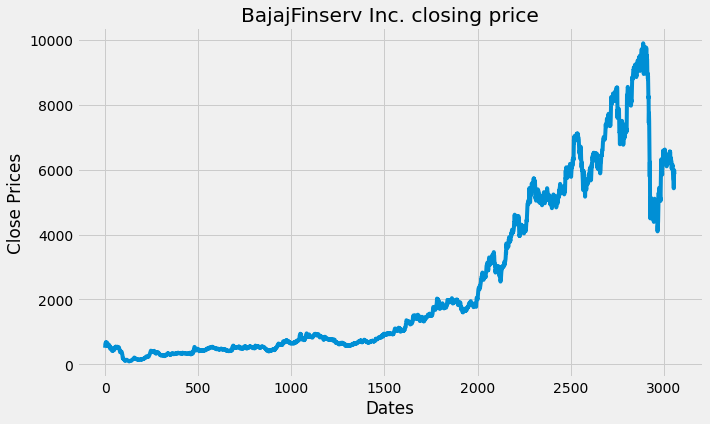

In [246]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['close'])
plt.title('BajajFinserv Inc. closing price')
plt.show()

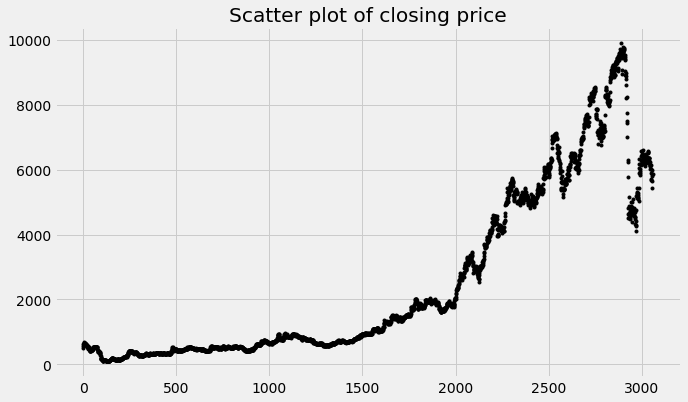

In [247]:
# Plot the scatter plot
df_close = data['close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [248]:
df1 = data[['date','close']]

In [249]:
df1.isnull().sum()

date     0
close    0
dtype: int64

## Removal of Outliers

In [250]:
#Describing the statistical information of the data
df1.close.describe()

count    3058.000000
mean     2482.831230
std      2613.983172
min        90.750000
25%       521.562500
50%       942.275000
75%      4697.925000
max      9894.250000
Name: close, dtype: float64

In [251]:
#Determining the quantile (q1,q2)
q1 = df1.close.quantile(0.25)
q3 = df1.close.quantile(0.75)
q1,q3

(521.5625, 4697.925)

In [252]:
# Determining the Inter Quartile Range
IQR = q3-q1
IQR

4176.3625

In [253]:
# Determining the lower limit and the upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(-5742.981250000001, 10962.46875)

In [254]:
#Here are the outliers
df1[(df1.close<lower_limit)|(df1.close>upper_limit)]

,date,close


In [255]:
# Data free from outliers are taken for analysis
df1_no_outlier = df1[(df1.close>lower_limit)&(df1.close<upper_limit)]
df1_no_outlier

,date,close
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00
...,...,...
3053,2020-09-24,5425.70
3054,2020-09-25,5803.30
3055,2020-09-28,5985.95
3056,2020-09-29,5876.70


In [256]:
# Convert Date into Datetime
df1_no_outlier['date']=pd.to_datetime(df1_no_outlier['date'])

In [257]:
# Indexing with respect to date column
df1_no_outlier.set_index('date',inplace=True)

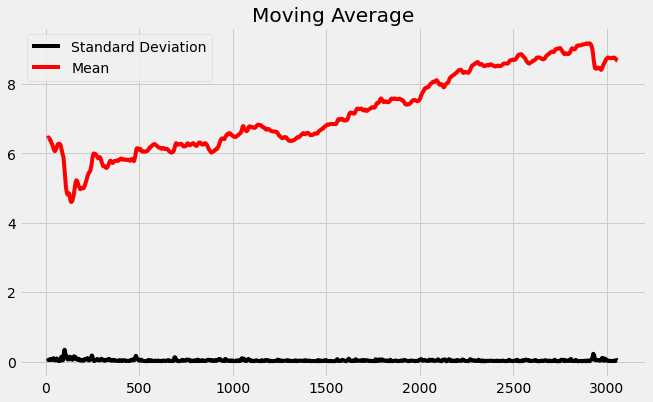

In [258]:
# Determing the standard deviation and the mean value of the data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [259]:
df_close = df1_no_outlier['close']

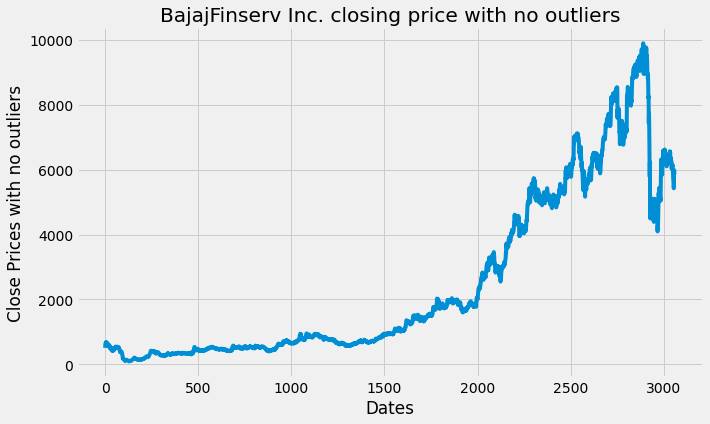

In [260]:
#plot close price with no outliers
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices with no outliers')
plt.plot(data['close'])
plt.title('BajajFinserv Inc. closing price with no outliers')
plt.show()

## Exploratory Data Analysis

In [261]:
#Seed for FB prophet model
myfavouritenumber = 37
seed = myfavouritenumber
np.random.seed(seed)

In [262]:
#Fitting the FB prophet model
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["date", "close"] + exogenous_features].rename(columns={"date": "ds", "close": "y"}))

forecast = model_fbp.predict(df_valid[["date", "close"] + exogenous_features].rename(columns={"date": "ds"}))
df_valid["Forecast_Prophet"] = forecast.yhat.values

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


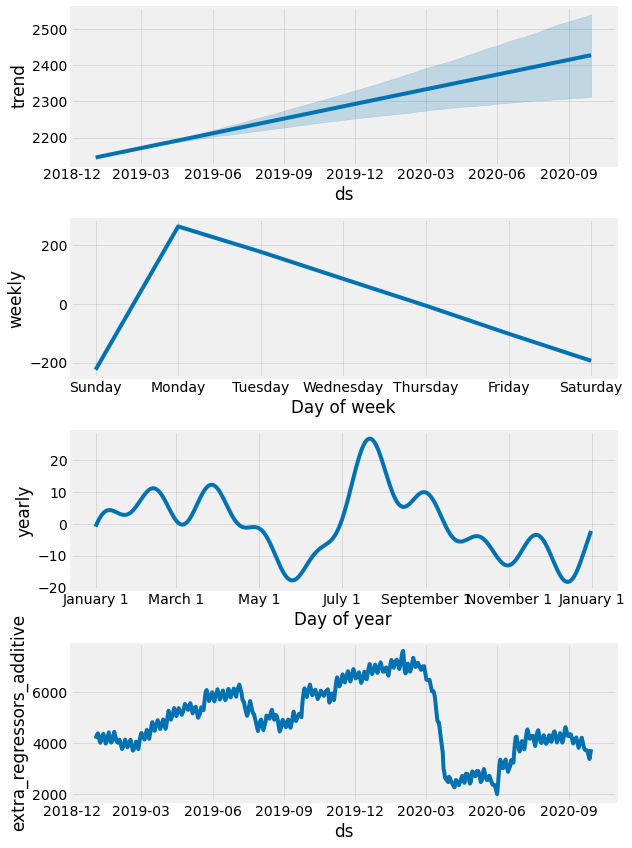

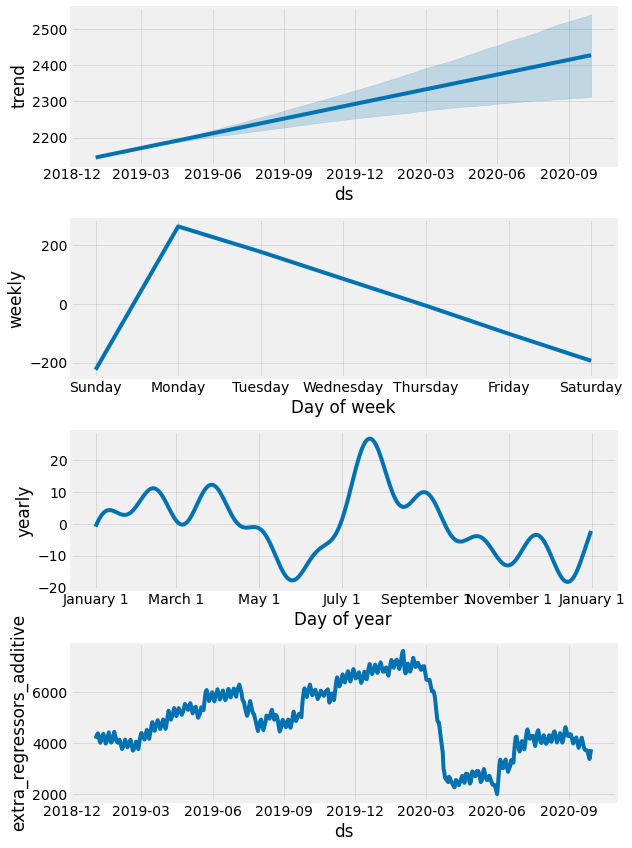

In [150]:
# Forecasting the data for EDA
model_fbp.plot_components(forecast)

## Testing For Stationarity

In [263]:
test_result=adfuller(df1_no_outlier['close'])

In [264]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [265]:
adfuller_test(df1_no_outlier['close'])

ADF Test Statistic : -0.9731769554060277
p-value : 0.762921262874902
#Lags Used : 18
Number of Observations Used : 3039
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [266]:
#Differencing of Close price

df1_no_outlier['Sales First Difference'] = df1_no_outlier['close'] - df1_no_outlier['close'].shift(1)

In [267]:
## Again test dickey fuller test
adfuller_test(df1_no_outlier['Sales First Difference'].dropna())

ADF Test Statistic : -11.412386868485182
p-value : 7.19752458615437e-21
#Lags Used : 17
Number of Observations Used : 3039
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


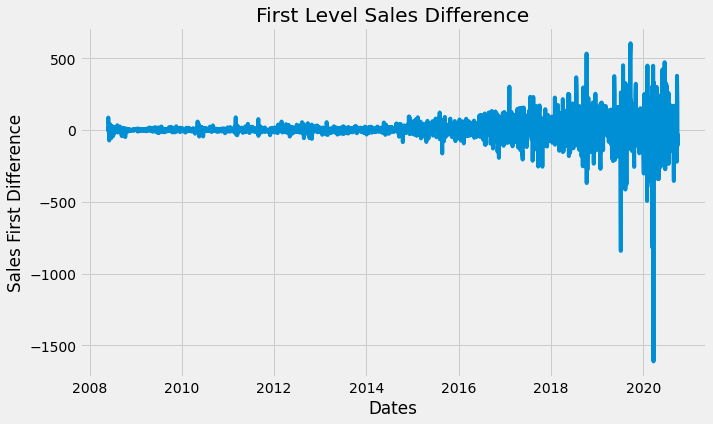

In [268]:
#plot close price with no outliers
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Sales First Difference')
plt.plot(df1_no_outlier['Sales First Difference'])
plt.title('First Level Sales Difference')
plt.show()

In [269]:
df1_no_outlier

,close,Sales First Difference
date,,
2008-05-26,509.10,NaN
2008-05-27,554.65,45.55
2008-05-28,640.95,86.30
2008-05-29,632.40,-8.55
2008-05-30,644.00,11.60
...,...,...
2020-09-24,5425.70,-220.95
2020-09-25,5803.30,377.60
2020-09-28,5985.95,182.65


In [270]:
df1_no_outlier.dropna(axis = 0, inplace = True)

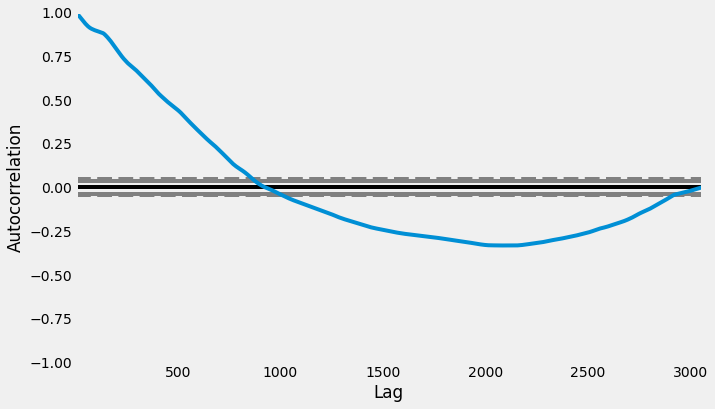

In [271]:
# Plotting the auto correlation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1_no_outlier['close'])
plt.show()

In [272]:
# Plotting the PACF and ACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

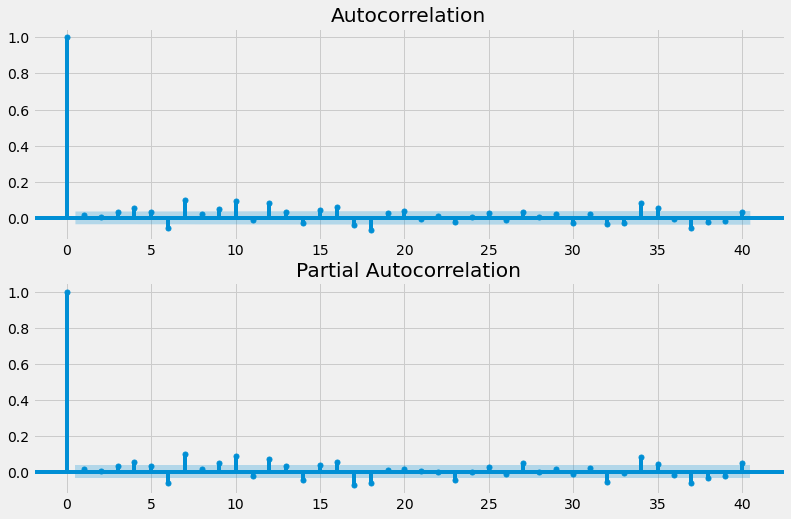

In [273]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1_no_outlier['Sales First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1_no_outlier['Sales First Difference'].dropna(),lags=40,ax=ax2)

In [274]:
# Splitting the data into train and test data
df1_train = df1_no_outlier[df1_no_outlier.index < "2019"]
df1_test = df1_no_outlier[df1_no_outlier.index >= "2019"]

In [275]:
df1_train

,close,Sales First Difference
date,,
2008-05-27,554.65,45.55
2008-05-28,640.95,86.30
2008-05-29,632.40,-8.55
2008-05-30,644.00,11.60
2008-06-02,686.95,42.95
...,...,...
2018-12-24,6274.45,-85.65
2018-12-26,6439.05,164.60
2018-12-27,6405.05,-34.00


In [276]:
df1_train.shape

(2623, 2)

In [277]:
df1_test.shape

(434, 2)

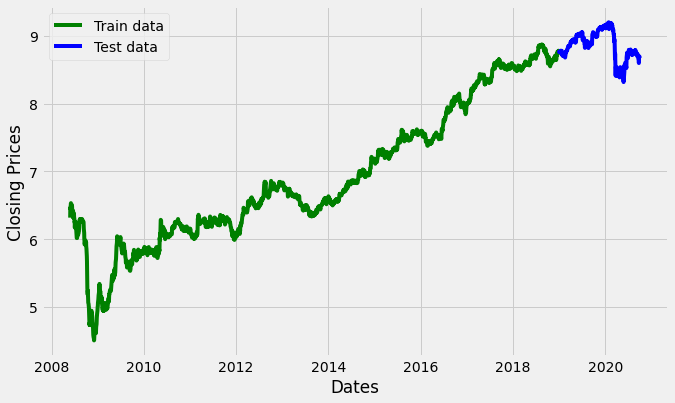

In [278]:
# Taking the log values of the train and test data
train_data, test_data = np.log(df1_train['close']), np.log(df1_test['close'])

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [279]:
train_data.shape, test_data.shape

((2623,), (434,))

## ARIMAX model

In [280]:
# Sending the data to df6 for the ARIMAX model
df6 = data

In [281]:
# Convert Date into Datetime
df6['date']=pd.to_datetime(df6['date'])

In [282]:
# Setting the date column as index
df6.set_index("date", drop=False, inplace=True)
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
date,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669


In [171]:
# Determining the lag features for the model by keeping the window for three days, 1 week and 1 month
df6.reset_index(drop=True, inplace=True)
lag_features = ["high", "low", "volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df6[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df6[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df6[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df6[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df6[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df6[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df6[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df6[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df6[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df6.fillna(df6.mean(), inplace=True)

df6.set_index("date", drop=False, inplace=True)
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,...,low_mean_lag30,low_std_lag3,low_std_lag7,low_std_lag30,volume_mean_lag3,volume_mean_lag7,volume_mean_lag30,volume_std_lag3,volume_std_lag7,volume_std_lag30
date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,2419.112305,34.537701,54.205170,117.997185,2.070975e+05,2.091842e+05,2.171792e+05,98249.515625,129348.914062,189212.671875
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,501.000000,34.537701,54.205170,117.997185,3.145446e+06,3.145446e+06,3.145446e+06,98249.515625,129348.914062,189212.671875
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,496.049988,7.000357,7.000357,7.000357,3.747295e+06,3.747295e+06,3.747295e+06,851143.000000,851143.000000,851143.000000
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,518.700012,39.542004,39.542004,39.542004,4.027783e+06,4.027783e+06,4.027783e+06,773461.562500,773461.562500,773461.562500
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,541.025024,59.042385,55.099934,55.099934,4.486735e+06,4.151413e+06,4.151413e+06,123703.664062,678207.750000,678207.750000


In [172]:
#Determing the other exogenous features
df6.date = pd.to_datetime(df6.date, format="%Y-%m-%d")
df6["month"] = df6.date.dt.month
df6["week"] = df6.date.dt.week
df6["day"] = df6.date.dt.day
df6["day_of_week"] = df6.date.dt.dayofweek
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,...,volume_mean_lag3,volume_mean_lag7,volume_mean_lag30,volume_std_lag3,volume_std_lag7,volume_std_lag30,month,week,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,2.070975e+05,2.091842e+05,2.171792e+05,98249.515625,129348.914062,189212.671875,5,22,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,3.145446e+06,3.145446e+06,3.145446e+06,98249.515625,129348.914062,189212.671875,5,22,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,3.747295e+06,3.747295e+06,3.747295e+06,851143.000000,851143.000000,851143.000000,5,22,28,2
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,4.027783e+06,4.027783e+06,4.027783e+06,773461.562500,773461.562500,773461.562500,5,22,29,3
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,4.486735e+06,4.151413e+06,4.151413e+06,123703.664062,678207.750000,678207.750000,5,22,30,4


In [173]:
# Splitting the data into train and test data
df_train = df6[df6.date < "2019"]
df_valid = df6[df6.date >= "2019"]

# Assigning the lag values and other additional date time values to the exogenous feature data frame
exogenous_features = ["high_mean_lag3", "high_std_lag3", "low_mean_lag3", "low_std_lag3",
                      "volume_mean_lag3", "volume_std_lag3",
                      "high_mean_lag7", "high_std_lag7", "low_mean_lag7", "low_std_lag7",
                      "volume_mean_lag7", "volume_std_lag7","high_mean_lag30", "high_std_lag30", 
                      "low_mean_lag30", "low_std_lag30",
                      "volume_mean_lag30", "volume_std_lag30","month", "week", "day", "day_of_week"]

In [175]:
# Fitting the ARIMAX model
model = auto_arima(df_train.close, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.close, exogenous=df_train[exogenous_features])

# Predicting the close price data for the test data
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast"] = forecast

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=29420.812, BIC=29585.240, Time=19.686 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=30059.492, BIC=30200.431, Time=5.339 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=29469.849, BIC=29616.660, Time=10.903 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=29774.489, BIC=29921.300, Time=10.552 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=48092.288, BIC=48227.354, Time=4.682 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=29334.500, BIC=29493.057, Time=13.168 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=29330.324, BIC=29483.007, Time=14.749 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=29322.264, BIC=29480.820, Time=20.347 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=29364.293, BIC=29528.722, Time=19.254 seconds
Fit ARIMA(0,0,4)x(0,0,0,0) [intercept=True]; AIC=29385.738, BIC=29550.166, Time=16.234 seconds
Fit ARIM

In [176]:
aa_rmse = np.sqrt(mean_squared_error(df_valid.close, df_valid.Forecast))
aa_mae = mean_absolute_error(df_valid.close, df_valid.Forecast)
aa_rmse
aa_mae

165.85401837418948

In [177]:
# Evaluation metrics of the ARIMAX model
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.close, df_valid.Forecast)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.close, df_valid.Forecast))


RMSE of Auto ARIMAX: 235.27403642497327

MAE of Auto ARIMAX: 165.85401837418948


<AxesSubplot:xlabel='date'>

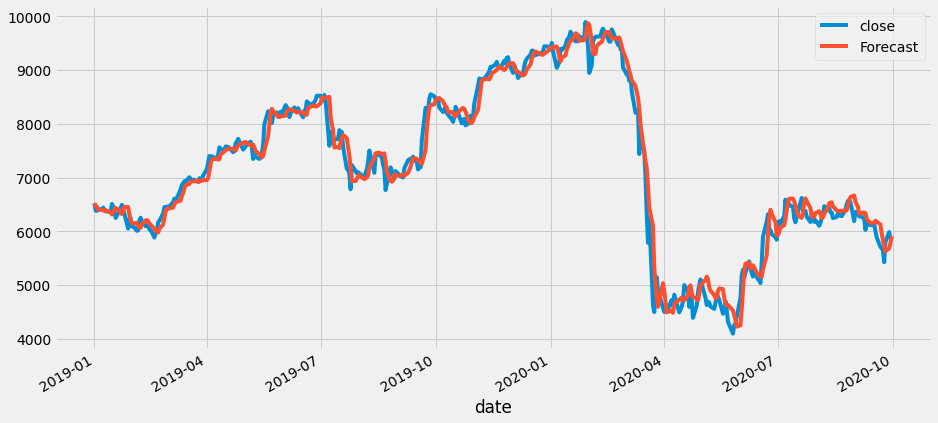

In [178]:
# Forecasting the close price through ARIMAX model
df_valid[["close", "Forecast"]].plot(figsize=(14, 7))

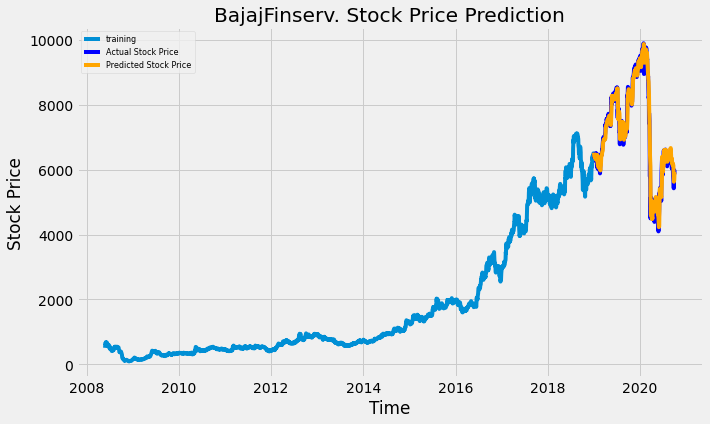

In [179]:
plt.plot(df_train.close, label='training')
plt.plot(df_valid.close, color = 'blue', label='Actual Stock Price')
plt.plot(df_valid.Forecast, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.10)


plt.title('BajajFinserv. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## ARIMA

In [283]:
# Fitting the ARIMA model
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2622
Model:                 ARIMA(0, 1, 0)   Log Likelihood                5991.225
Method:                           css   S.D. of innovations              0.025
Date:                Tue, 15 Dec 2020   AIC                         -11978.451
Time:                        22:08:06   BIC                         -11966.707
Sample:                             1   HQIC                        -11974.198
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      1.949      0.051    -5.3e-06       0.002


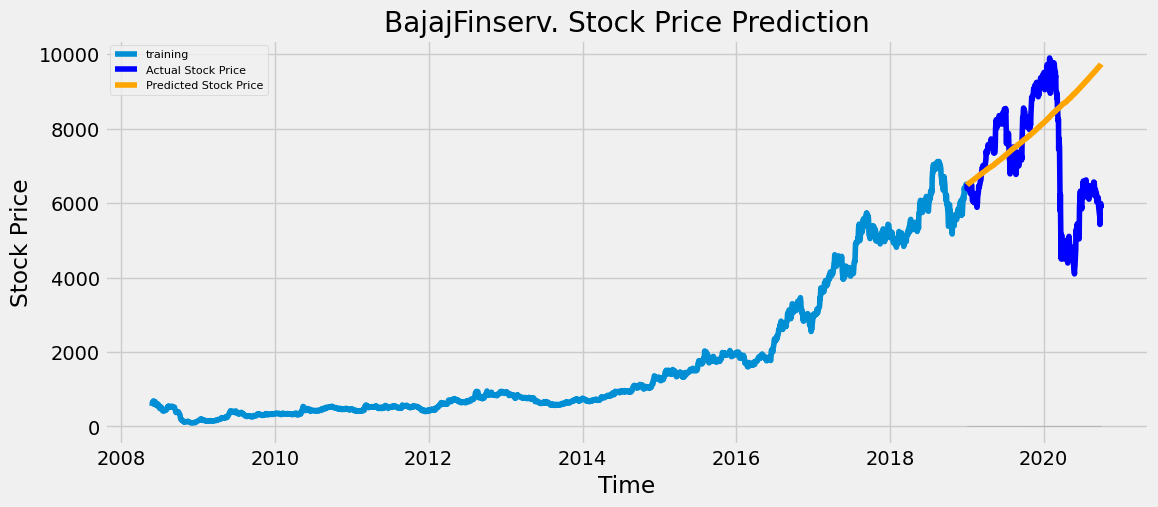

In [284]:
# Forecasting the close price through ARIMA model
fc, se, conf = fitted.forecast(test_data.shape[0], alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.exp(train_data), label='training')
plt.plot(np.exp(test_data), color = 'blue', label='Actual Stock Price')
plt.plot(np.exp(fc_series), color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)


plt.title('BajajFinserv. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [182]:
a_rmse = np.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc_series)))
a_mae = mean_absolute_error(np.exp(test_data), np.exp(fc_series))
a_rmse
a_mae

1575.3517036281069

In [183]:
# Determining the evaluation metrics of the ARIMA model
print("RMSE of ARIMA:", np.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc_series))))
print("\nMAE of ARIMA:", mean_absolute_error(np.exp(test_data), np.exp(fc_series)))


RMSE of ARIMA: 2110.6232978934313

MAE of ARIMA: 1575.3517036281069


In [184]:
# Determing the stock price or 4 months after 2020  
index_future_dates=pd.date_range(start='2020-11-01',end='2021-04-30')
#print(index_future_dates)
pred_arima=test_data[0:181].rename('Arima Predictions')
#print(comp_pred)
pred_arima.index=index_future_dates

In [185]:
y = np.exp(pred_arima)
y

2020-11-01    6521.95
2020-11-02    6384.00
2020-11-03    6383.30
2020-11-04    6410.45
2020-11-05    6407.15
               ...   
2021-04-26    7188.65
2021-04-27    7693.65
2021-04-28    8297.75
2021-04-29    8240.70
2021-04-30    8255.60
Freq: D, Name: Arima Predictions, Length: 181, dtype: float64

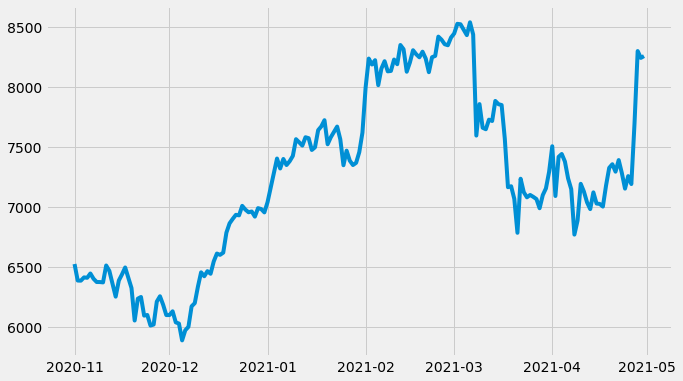

In [186]:
# Plotting the future data
plt.plot(y)

## LSTM

In [187]:
data = data1

In [188]:
data.shape

(3058, 11)

In [189]:
data.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669


In [190]:
df4 = data[['date','close']]

In [191]:
df4

,date,close
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00
...,...,...
3053,2020-09-24,5425.70
3054,2020-09-25,5803.30
3055,2020-09-28,5985.95
3056,2020-09-29,5876.70


In [192]:
df4.isnull().sum()

date     0
close    0
dtype: int64

In [193]:
df4.close.describe()

count    3058.000000
mean     2482.831230
std      2613.983172
min        90.750000
25%       521.562500
50%       942.275000
75%      4697.925000
max      9894.250000
Name: close, dtype: float64

In [194]:
q1 = df4.close.quantile(0.25)
q3 = df4.close.quantile(0.75)
q1,q3

(521.5625, 4697.925)

In [195]:
# Determining the Inter Quartile Range
IQR = q3-q1
IQR

4176.3625

In [196]:
# Determining the lower limit and the upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(-5742.981250000001, 10962.46875)

In [197]:
#Here are the outliers
df4[(df4.close<lower_limit)|(df4.close>upper_limit)]

,date,close


In [198]:
df4_no_outlier = df4[(df4.close>lower_limit)&(df4.close<upper_limit)]
df4_no_outlier

,date,close
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00
...,...,...
3053,2020-09-24,5425.70
3054,2020-09-25,5803.30
3055,2020-09-28,5985.95
3056,2020-09-29,5876.70


In [199]:
df4_no_outlier=df4_no_outlier.reset_index()['close']

In [200]:
df4_no_outlier.shape

(3058,)

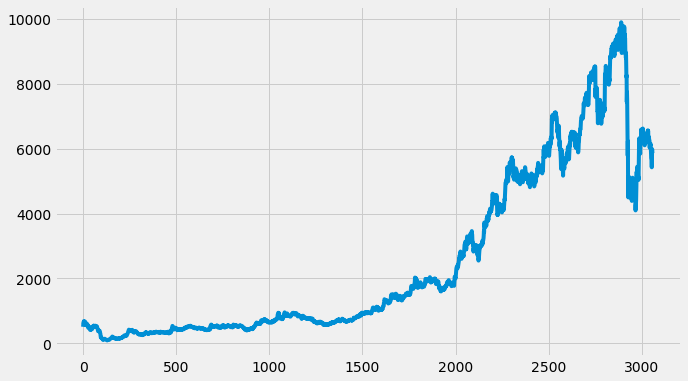

In [201]:
plt.plot(df4_no_outlier)

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4_no_outlier=scaler.fit_transform(np.array(df4_no_outlier).reshape(-1,1))

In [203]:
print(df4_no_outlier)

[[0.04267353]
 [0.04731983]
 [0.05612281]
 ...
 [0.60133626]
 [0.59019228]
 [0.58770847]]


In [204]:
##splitting dataset into train and test split
training_size=int(len(df4_no_outlier)*0.9072)
test_size=len(df4_no_outlier)-training_size
train_data,test_data=df4_no_outlier[0:training_size,:],df4_no_outlier[training_size:len(df4_no_outlier),:1]

In [205]:
training_size,test_size

(2774, 284)

In [206]:
train_data

array([[0.04267353],
       [0.04731983],
       [0.05612281],
       ...,
       [0.70344265],
       [0.71460193],
       [0.72032437]])

In [207]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [208]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [209]:
print(X_train.shape), print(y_train.shape)

(2673, 100)
(2673,)


(None, None)

In [210]:
print(X_test.shape), print(ytest.shape)

(183, 100)
(183,)


(None, None)

In [211]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [212]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [213]:
# Creating the model by adding the different LSTM, DROPOUT AND DENSE layers
model=Sequential()

model.add(LSTM(50,activation = 'relu', return_sequences=True,input_shape=(X_train.shape[1],1)))
#model.add(Dropout(0.2))
model.add(Dropout(0.5))

model.add(LSTM(60,activation = 'relu', return_sequences=True))
#model.add(Dropout(0.3))
model.add(Dropout(0.6))

model.add(LSTM(80,activation = 'relu', return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dropout(0.7))

model.add(LSTM(120,activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dropout(0.8))

#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [214]:
X_train.shape[1],1

(100, 1)

In [215]:
# Checking the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [106]:
#Fitting the above created model and running it for 30 epochs
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Train on 2673 samples, validate on 183 samples
Epoch 1/30


2673/2673 [==============================] - 42s 16ms/sample - loss: 0.0326 - val_loss: 0.0327
Epoch 2/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0101 - val_loss: 0.0289
Epoch 3/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0111 - val_loss: 0.0245
Epoch 4/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0078 - val_loss: 0.0382
Epoch 5/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0083 - val_loss: 0.0154
Epoch 6/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0068 - val_loss: 0.0320
Epoch 7/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0073 - val_loss: 0.0455
Epoch 8/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0067 - val_loss: 0.0259
Epoch 9/30
2673/2673 [==============================] - 28s 10ms/sample - loss: 0.0071 - val_loss: 0.0172
Epoch 10/30
2673/2673 [==============================] - 

In [107]:
import tensorflow as tf

In [108]:
tf.__version__

'2.1.0'

In [109]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [110]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [111]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

2090.0688297141755

In [112]:
#Training
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

2090.0688297141755

In [216]:
l_rmse = np.sqrt(mean_squared_error(ytest, test_predict))
l_mae = mean_absolute_error(ytest, test_predict)
l_rmse
l_mae

4523.343155507633

In [217]:
#Testing
### Test Data RMSE and MAE
print("RMSE of LSTM:", np.sqrt(mean_squared_error(ytest, test_predict)))
print("\nMAE of LSTM:", mean_absolute_error(ytest, test_predict))

RMSE of LSTM: 4623.992300683722

MAE of LSTM: 4523.343155507633


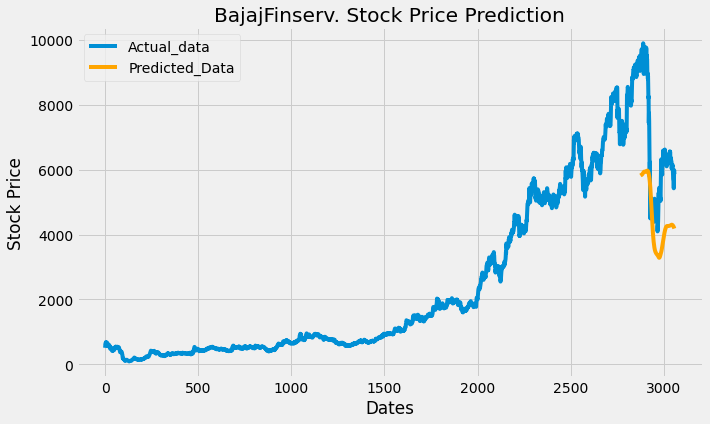

In [218]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4_no_outlier)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4_no_outlier)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4_no_outlier)-1, :] = test_predict

#Predictions
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.plot(scaler.inverse_transform(df4_no_outlier), label = 'Actual_data')
#plt.plot(trainPredictPlot, 'green', label = 'Actual_data' )
plt.plot(testPredictPlot, 'orange', label = 'Predicted_Data' )
plt.title('BajajFinserv. Stock Price Prediction')
plt.legend()
plt.show()

## Comparison of Results

In [116]:
# Converting the metrics into float values
aa_rmse = float("%.2f" %aa_rmse)
aa_mae = float("%.2f" % aa_mae)
a_rmse = float("%.2f" % a_rmse)
a_mae = float("%.2f" % a_mae)
l_rmse = float("%.2f" % l_rmse)
l_mae = float("%.2f" %l_mae)

In [117]:
# Adding the data from dictionary to data frame
dict_RMSE = {'RMSE': [a_rmse, aa_rmse, l_rmse], 'MAE': [a_mae, aa_mae, l_mae]}
RMSE = pd.DataFrame(dict_RMSE, index = ['ARIMA','ARIMAX','LSTM'])
print (RMSE)




#a_rmse, aa_rmse, l_rmse

           RMSE      MAE
ARIMA   2110.62  1575.35
ARIMAX   235.27   165.85
LSTM    4623.99  4523.34


In [118]:
a = RMSE.index[0]
a = [RMSE.index[0], RMSE.index[1], RMSE.index[2]]
#a = 'Models'

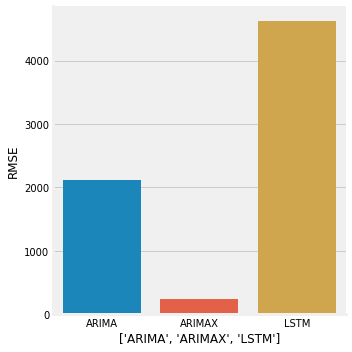

In [119]:
#Plotting the comparison of RMSE values of the ARIMA, ARIMAX and LSTM models
'''g = sns.factorplot(y= 'RMSE', x = 'RMSE', data = RMSE, kind = 'bar', legend = False)

g.set_ylabels("RMSE")
g.set_xlabels('ARIMAX       ARIMA       LSTM ')'''
sns.factorplot(y= 'RMSE', x = a, data = RMSE, kind = 'bar')

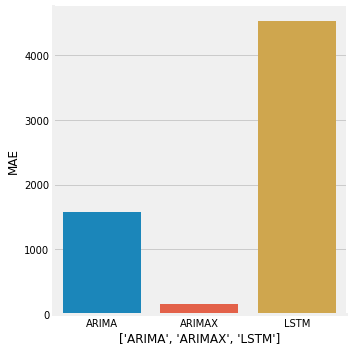

In [120]:
##Plotting the comparison of MAE values of the ARIMA, ARIMAX and LSTM models
#sns.factorplot(y= 'MAE', x = 'MAE', data = RMSE, kind = 'bar')
sns.factorplot(y= 'MAE', x = a, data = RMSE, kind = 'bar')